### 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
#библиотеки
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv')

data.info()
display(data.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


###  2. Подготовка данных

#### ***План действий***
- Заменить названия столбцов (привести к нижнему регистру)
- Преобразовать данные в нужные типы
- Обработать пропуски при необходимости
- Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец

In [3]:
# Приведение к нижнему регистру
data.columns = data.columns.str.lower()
str_columns = ['name', 'platform', 'genre', 'rating']
for column in str_columns:
    data[column] = data[column].str.lower()
display(data.sample(10))
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2094,midnight club: la remix,psp,2008.0,racing,0.52,0.27,0.00,0.19,79.0,8.7,t
694,yokai watch busters,3ds,2015.0,action,0.00,0.00,2.29,0.00,NaN,NaN,NaN
14227,special forces: nemesis strike,xb,2005.0,shooter,0.03,0.01,0.00,0.00,60.0,6.5,m
5183,dragon ball z: attack of the saiyans,ds,2009.0,role-playing,0.12,0.02,0.21,0.01,73.0,7.9,e10+
6889,dreamcast collection,x360,2011.0,misc,0.16,0.06,0.00,0.02,53.0,5.2,t
1295,tom clancy's ghost recon: future soldier,x360,2012.0,shooter,0.93,0.40,0.02,0.12,79.0,7.2,m
4061,pac-man world 2,xb,2002.0,action,0.36,0.11,0.00,0.02,66.0,tbd,e
14984,dungeon siege ii,pc,2005.0,role-playing,0.00,0.02,0.00,0.00,80.0,7.9,m
6153,assassin's creed ii: discovery,ds,2009.0,action,0.15,0.11,0.00,0.03,69.0,7.3,t
9523,dreamworks 2-in-1 party pack,ds,2010.0,misc,0.12,0.00,0.00,0.01,NaN,tbd,e


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##### **Обработка пропусков**

In [4]:
# name
print(data[data['name'].isna() ==True])
data.dropna(subset = ['name'], inplace = True)
data.info()

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      gen           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      gen           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+

In [5]:
# year_of_release

release_loc = data[['name', 'year_of_release']]
release_loc = release_loc[release_loc['year_of_release'].isna() == False] #только с датой релиза

release_loc['name'] = release_loc['name'].drop_duplicates() #долой дубликаты
release_loc.dropna(subset = ['name'], inplace = True) #избавляемся от пустых

release_loc.rename(columns = {'year_of_release': 'release_loc'}, inplace=True)
release_loc.set_index(['name'],inplace=True)

data.set_index(['name'],inplace=True)

data = data.join(release_loc) 
data = data.reset_index()

data['year_of_release'] = data['year_of_release'].fillna(0)

def change_release(row):
    if  row['year_of_release'] < 1980:
        return row['release_loc']
    return row['year_of_release'] 

data['year_of_release'] = data.apply(change_release, axis=1)  
del data['release_loc']

data['year_of_release'] = data['year_of_release'].astype('Int64')
display(data.sample(10))
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2656,dance dance revolution universe 3,x360,2008,simulation,0.28,0.00,0.00,0.02,65.0,7.7,e
14026,the amazing spider-man 2 (2014),xone,2014,action,0.12,0.08,0.00,0.02,NaN,NaN,NaN
15173,tornado,ds,NaN,action,0.07,0.00,0.00,0.00,44.0,tbd,e
11328,rengoku ii: the stairway to h.e.a.v.e.n.,psp,2006,action,0.02,0.00,0.00,0.00,51.0,7.6,t
7671,madden nfl 11,ps2,2010,sports,0.41,0.02,0.00,0.07,NaN,7,e
8382,mighty beanz: pocket puzzles,gba,2004,puzzle,0.04,0.01,0.00,0.00,37.0,tbd,e
1982,castle shikigami 2,ps2,2004,shooter,0.01,0.01,0.00,0.00,67.0,7.4,e
11450,rigs: mechanized combat league,ps4,2016,action,0.03,0.05,0.01,0.02,79.0,7.9,t
2788,dead head fred,psp,2007,action,0.04,0.00,0.00,0.00,75.0,7.3,m
5667,harry potter and the half-blood prince,wii,2009,action,0.28,0.39,0.00,0.08,60.0,6,e10+


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16567 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [6]:
# critic_score
#display(data[data['critic_score'].isna() ==True])
display(data[data['critic_score'] ==0])
data['critic_score'] = data['critic_score'].fillna(0)
data['critic_score'] = data['critic_score'].astype('int')
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16567 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(4), int64(1), object(5)
memory usage: 1.4+ MB


In [7]:
# user_score
#display(data[data['user_score'].isna() ==True])
display(data[data['user_score'] =='tbd'])
data.loc[data['user_score'] =='tbd','user_score'] = 888
data['user_score'] = data['user_score'].astype('float64')

data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
22,007: quantum of solace,ds,2008,action,0.11,0.01,0.0,0.01,65,tbd,t
29,10 minute solution,wii,2010,sports,0.06,0.01,0.0,0.01,0,tbd,e
34,1001 touch games,ds,2011,action,0.11,0.16,0.0,0.04,0,tbd,e
35,101-in-1 explosive megamix,ds,2008,puzzle,0.05,0.12,0.0,0.02,46,tbd,e
37,101-in-1 sports megamix,ds,2010,sports,0.08,0.00,0.0,0.01,0,tbd,e10+
...,...,...,...,...,...,...,...,...,...,...,...
16697,zoocube,gba,2002,puzzle,0.03,0.01,0.0,0.00,71,tbd,e
16701,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,0,tbd,e
16704,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,0,tbd,t
16705,zumba fitness core,wii,2012,misc,0.00,0.06,0.0,0.01,0,tbd,e10+


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16567 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
# rating
display(data['rating'].value_counts())
data['rating'] = data['rating'].fillna('undefined')


e       3990
t       2961
m       1563
e10+    1420
ec         8
rp         3
k-a        3
ao         1
Name: rating, dtype: int64

In [9]:
# Cуммарные продажи во всех регионах 

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.sample(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
350,all grown up! express yourself,gba,2004,misc,0.13,0.05,0.00,0.00,0,NaN,undefined,0.18
11242,ready 2 rumble boxing: round 2,n64,2000,fighting,0.19,0.05,0.00,0.00,0,NaN,undefined,0.24
9367,nba live 2000,n64,1999,sports,0.42,0.02,0.00,0.00,0,NaN,undefined,0.44
11234,reader rabbit 2nd grade,wii,NaN,misc,0.04,0.00,0.00,0.00,0,888.0,e,0.04
13779,tales of innocence r,psv,2012,role-playing,0.00,0.00,0.10,0.00,0,NaN,undefined,0.10
14697,the witcher 3: wild hunt,xone,2015,role-playing,0.69,0.50,0.00,0.11,91,9.2,m,1.30
5927,hitman: hd trilogy,ps3,2013,action,0.07,0.09,0.00,0.04,71,7.6,m,0.20
16611,yuu yuu hakusho 2: kakutou no sho,snes,1994,fighting,0.00,0.00,0.31,0.00,0,NaN,undefined,0.31
12543,singstar pop hits,ps2,2007,misc,0.00,0.50,0.00,0.15,0,NaN,undefined,0.65
6299,irozuki tingle no koi no balloon trip,ds,2009,adventure,0.00,0.00,0.11,0.00,0,NaN,undefined,0.11


### Выводы.
Данные с пропусками в столбце `name` удаляем. Этот столбец является ключевым, без названия игры  все остальные данные абсолютно бессмыслены. К счастью таких данных мало и они не повлияют на исследование.

Пропуски в столбце `year_of_release` по возможности заменяем на данные с други платформ. Для этого в отдельной таблце собираем все уникальные названия игр и даты релизов. Далее добавляем эту таблицу к общей методом join(), потом с помощью функции и метода apply() проверяем каждую строку в столбце `year_of_release` и заменяем на значение из присоединенного столбца `release_loc`. После проведенной замены столбец `release_loc` удаляем. Встолбце остаются пропуски ненайденых дат релизов, но уже не в таком существенном количестве.

Пропуски в столбце `critic_score`. После проверки на наличие в столбце рейтинга со значением 0(отсутствуют), принято решение все пропуски заменить на 0 и изменить тип данных столбца на 'int'. Данное решение позволяет испоользовать остальные данные строк с пропусками в данном столбце. Возможная причина пропусков: скорее всего данная игра не проходила оценку критиков.

Пропуски в столбце `user_score`. Возможные причины пропусков три: первая - сбой при выгрузке или человеческий фактор, вторая - в игру давно не играют и соответственно отсутствуют данные о рейтинге(характерно для игр старше 7 лет), третья - игра только вышла и о ней еще не знают(характерно для игр не страше 2 лет). Значения `tbd` в  столбце говорят о скором появлении данных('to be determined') и о том, что игра в активном состоянии и пользователи ее оценивают. Для дальнейшей возможности использовать столбец в исследовнии изменим тип данных на 'float64', а `tbd` присвоим числовое значение 888.

Пропуски в столбце `rating` принято решение не обрабатывать.

### 3. Исследовательский анализ данных

#### ***Ответим на некоторые вопросы:***

- Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Посмотреть как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. 
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0.5, 1, 'Количество игр выпускаемых в разные годы')

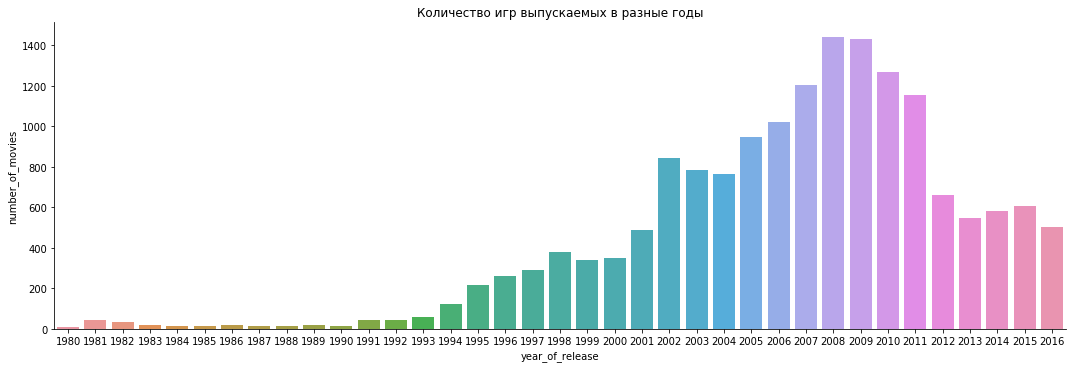

In [10]:
# Количество игр выпускаемых в разные годы

games_in_year = data.pivot_table(index = 'year_of_release', values='name', aggfunc = 'count')
games_in_year.rename(columns = {'name': 'number_of_movies'}, inplace=True)
games_in_year = games_in_year.reset_index()
sns.catplot(data=games_in_year, kind='bar', x= 'year_of_release', y='number_of_movies', aspect=3 )
plt.title('Количество игр выпускаемых в разные годы')


Text(0.5, 1.0, 'Продажи платформ в разные годы')

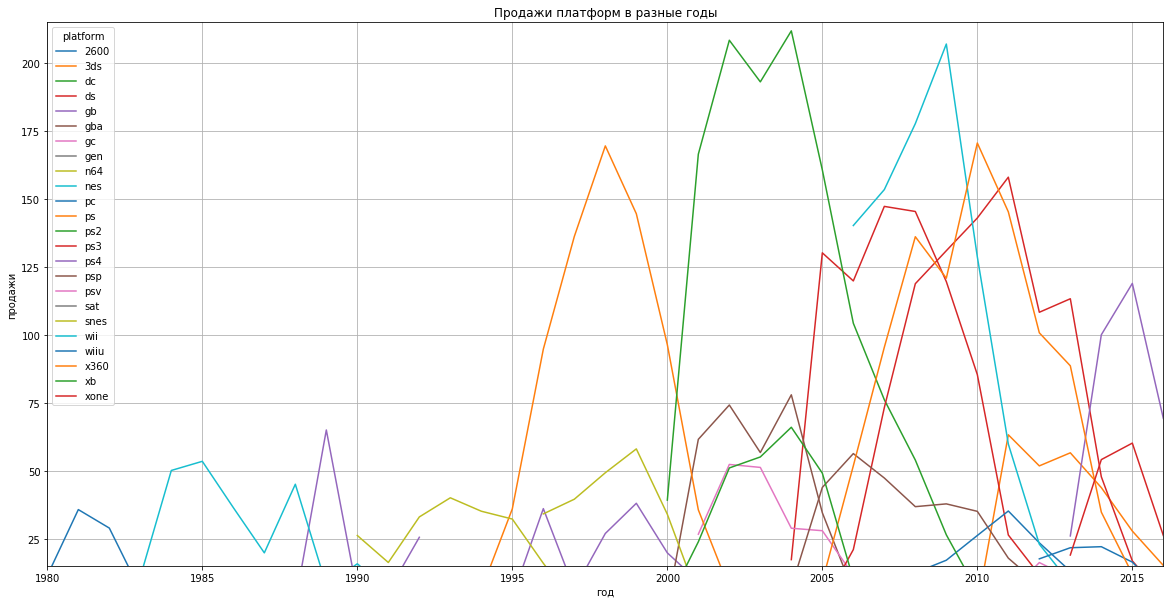

In [11]:
#Как менялись продажи по платформам

#Выборка платформ с наибольшими суммарными продажами
platform_total_sales = data.pivot_table(index = ['platform'], values='total_sales', aggfunc = 'sum')
#display(platform_total_sales.sort_values(by = 'total_sales', ascending = False))

platform_total_sales = platform_total_sales.reset_index()

platform_dic = []
def platform_list(row):
    platform = row['platform']
    if row['total_sales'] > 15:
        platform_dic.append(platform) 
    return platform_dic

platform_total_sales.apply(platform_list, axis=1)  
#display(platform_dic)

# График распределение по годам
data.query('platform in @platform_dic')\
.pivot_table(index='year_of_release', 
             columns = 'platform', values='total_sales', 
             aggfunc='sum').plot(grid=True, figsize=(20, 10)) 
plt.ylim(15, 215)
#plt.xlim(2012, 2014)
plt.ylabel('продажи')
plt.xlabel('год')
plt.title('Продажи платформ в разные годы') 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


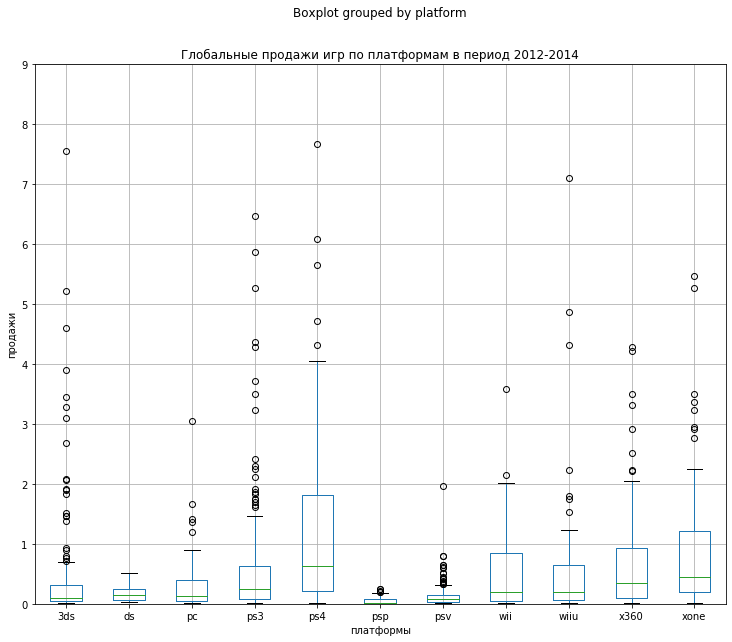

In [12]:
#График «ящик с усами» по глобальным продажам игр в разбивке по платформам
selection = data[(data['year_of_release']> 2012) & (data['year_of_release']<= 2014)]
selection.boxplot('total_sales', by='platform', figsize=(12, 10))
plt.ylim(0, 9)
plt.title('Глобальные продажи игр по платформам в период 2012-2014') 
plt.ylabel('продажи')
plt.xlabel('платформы')
plt.show()
None


Кореляция между рейтингом от пользователей и продажами платформы ps4 0.10217122000178054
Кореляция между отзывами критиков и продажами платформы ps4 0.30044463873225785
Кореляция между рейтингом от пользователей и продажами платформы xone -0.11272829055395371
Кореляция между отзывами критиков и продажами платформы xone 0.3621774936163823
Кореляция между рейтингом от пользователей и продажами платформы x360 -0.034828767366274736
Кореляция между отзывами критиков и продажами платформы x360 0.19096103742613665


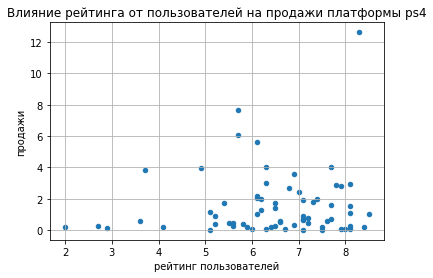

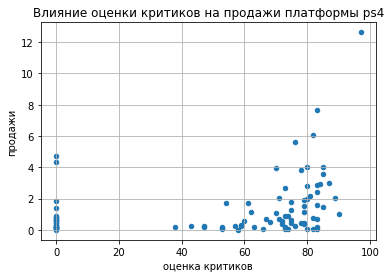

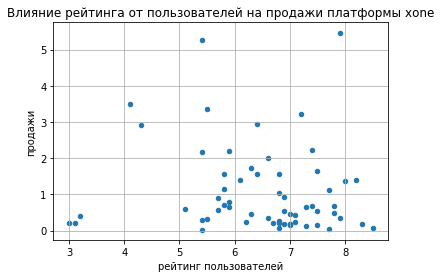

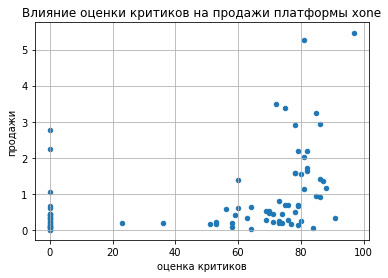

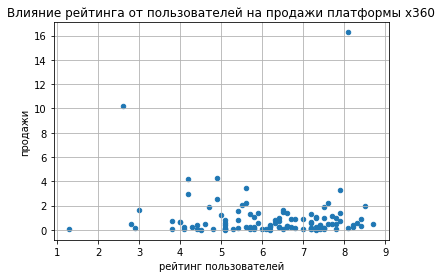

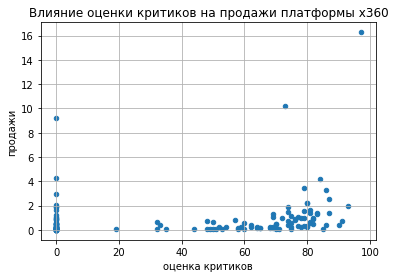

In [13]:
# Влияние отзывов пользователей на продажи платформы
#display(selection.groupby('year_of_release')['platform'].value_counts())
def user(name_platform):
    selection_user_score = selection[(selection['platform'] == name_platform) & (selection['user_score']!= 888)]
    selection_user_score.plot(x='user_score', y='total_sales', grid = True, kind='scatter', legend = True)
    lable = 'Влияние рейтинга от пользователей на продажи платформы ' + name_platform
    plt.ylabel('продажи')
    plt.xlabel('рейтинг пользователей')
    plt.title (lable)
    print('Кореляция между рейтингом от пользователей и продажами платформы', name_platform,
          selection_user_score['user_score'].corr(selection_user_score['total_sales']))


# Влияние отзывов критиков на продажи платформы
def critic(name_platform):
    selection_critic_score = selection[(selection['platform'] == name_platform) & (selection['user_score']!= 888)]
    selection_critic_score.plot(x='critic_score', y='total_sales', grid = True, kind='scatter')
    lable = 'Влияние оценки критиков на продажи платформы ' + name_platform
    plt.ylabel('продажи')
    plt.xlabel('оценка критиков')
    plt.title (lable)
    print('Кореляция между отзывами критиков и продажами платформы',  name_platform,
          selection_critic_score['critic_score'].corr(selection_critic_score['total_sales']))

platform_forecast = ['ps4','xone', 'x360']
for i in platform_forecast:
    user(i)
    critic(i)


Text(0.5, 1, 'Прибыльность жанров')

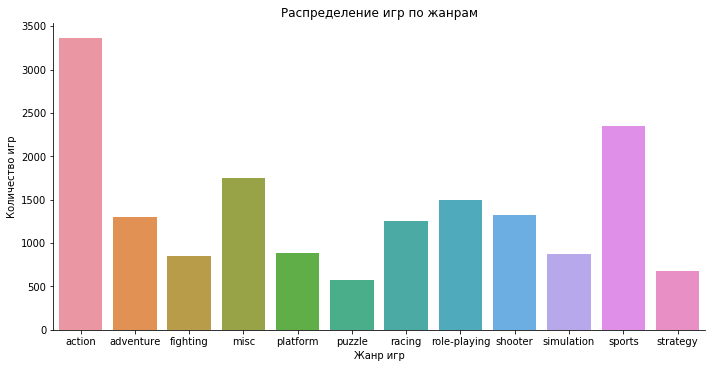

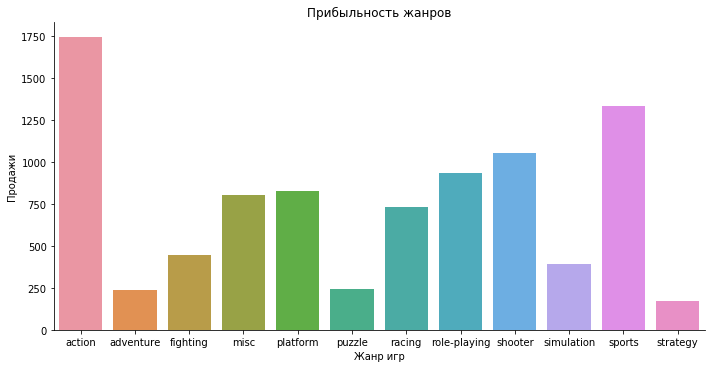

In [14]:
# Общее распределение игр по жанрам. 

games_genre = data.pivot_table(index = 'genre', values=['name', 'total_sales'],
                               aggfunc ={'name':'count', 'total_sales': 'sum'})
games_genre.rename(columns = {'name': 'number_of_movies'}, inplace=True)
games_genre = games_genre.reset_index()
sns.catplot(data=games_genre, kind='bar', x= 'genre', y='number_of_movies', aspect=2)
plt.ylabel('Количество игр')
plt.xlabel('Жанр игр')
plt.title('Распределение игр по жанрам')

# Прибыльность жанров
sns.catplot(data=games_genre, kind='bar', x= 'genre', y='total_sales', aspect=2 )
plt.ylabel('Продажи')
plt.xlabel('Жанр игр')
plt.title('Прибыльность жанров')

### Выводы.
- Сколько игр выпускалось в разные годы. Меньше всего игр выпускалось на заре индустрии в 1980 году, дальше направление игр уверенно набирало обороты с каждым годом. В данном исследовании самыми продуктивными годами оказались 2005-2011гг, далее объем выпуска игр идет на спад. Поскольку первые 13 лет количество выпускаемых игр слишком мала, для последующего исследования стоит брать выборку с 1994 по 2016. 
- Прогноз потенциально прибыльных платформы на 2017г. На графике видно поведение платформ, "вступающих" в  2016-2017 - лидирующая платформа `ps4`, а также `xone` и `x360`. Как показывает практика предыдущих лет, все эти платформы еще приносят прибыль, но находятся на стадии угасания. Эффективнее реклама будет работать у лидера - платформы `ps4`. Не исключено появление новых платформ, кторые будут в последствии набирать обороты.
- Как менялись продажи по платформам. Срез сделан по платформам с наибольшими суммарными продажами (не менее 15мл копий). Построен график распределение по годам. Всреднем за 7-11 лет появляются новые и исчезают старые платформы. Есть долгожители такие как `wiiu`(с 1994 года) и платформы, не выдерживающие конкуренции например `gen`(1990-1994). 

- График «ящик с усами» по глобальным продажам игр в разбивке по платформам. График построен на основе выборки за 2004-2015. Данная выборка была взята на основе ранее анализируемых данных и средней 'продолжительности жизни' игровых платформ. Каждый «Ящик» платформы ограничен первым и третьим квартилями. Внутри каждого ящика обозначена медиана продаж платформы. Лидером по продажам является платформа `ps4`, самые маленькие продажи у платформы `psp`. Разница в размахе диаграм продаж между лидером и отстающим около 4 миллиона проданных копий.
- Влияние отзывов пользователей и критиков на продажи. Для анализа взяты 3 платформа `ps4`, `xone` и `x360`. Диаграммы рассеяния говорят о том, что чем выше рейтинг на платформах, тем больше продаж. Коэффициент корреляции между рейтингом от пользователей и продажами платформы имеет значение окло 0 и отрицательные значения. То есть при изменении одной величины другая или останется почти прежней, или при росте одной величины будет уменьшаться другая. Коэффициент корреляции между оценкой критиков и продажами платформы показывает зависимость, однако не слишком сильной, то есть при увеличении одной величины, будет увеличиваться и вторая.

- Общее распределение игр по жанрам. Лидером окзался жанр `action`, разрыв между следующим конкурентом 'sports' весьма существенный - 1000 игр, антилидером стал жанр `puzzle` с количеством около 600 игр. В гистограмме прибыльности снова лидирует `action`, разрыв между следующим конкурентом 'sports' снова существенный - около 375 мл копий, антилидером  в прибыльности стал жанр `strategy`.

### 4. Портрет пользователя каждого региона

#### ***Определим для пользователя каждого региона (NA, EU, JP):***
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

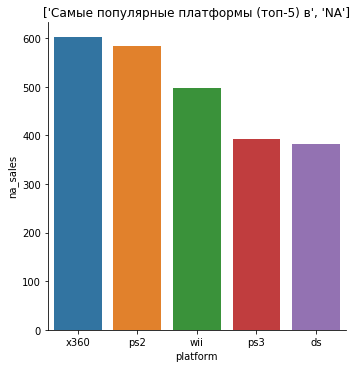

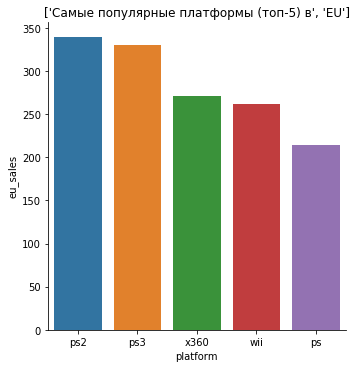

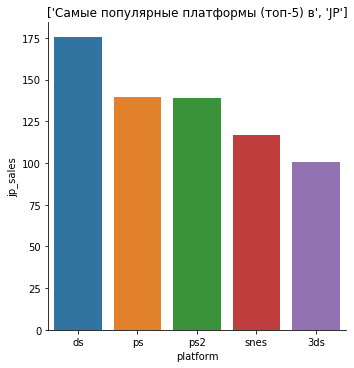

In [15]:
#  топ-5

def popularity(indicator, region_sales, text, region):
    popular_sel = data.pivot_table(index = indicator, values= region_sales,
                               aggfunc ='sum').sort_values(by=region_sales, ascending=False).head()
    popular_sel = popular_sel.reset_index()
    sns.catplot(data=popular_sel, kind='bar', x= indicator, y=region_sales, aspect=1)
    plt.title([text, region])           

# Платформы
platform = 'Самые популярные платформы (топ-5) в'
dic_reg = {'na_sales': 'NA', 'eu_sales': 'EU', 'jp_sales': 'JP'}

for k, v in dic_reg.items():
    region_sales = k
    region = dic_reg.get(k)
    popularity('platform', region_sales, platform, region)


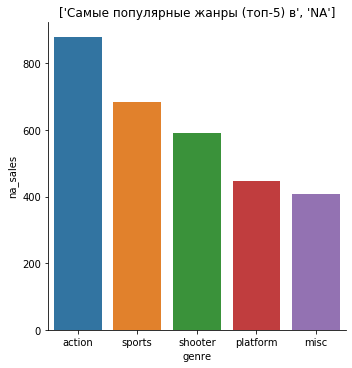

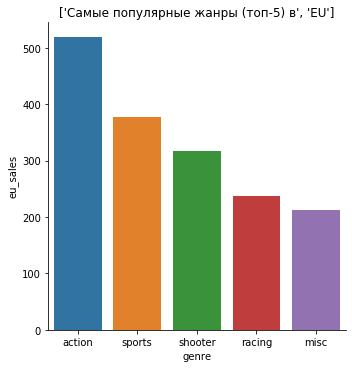

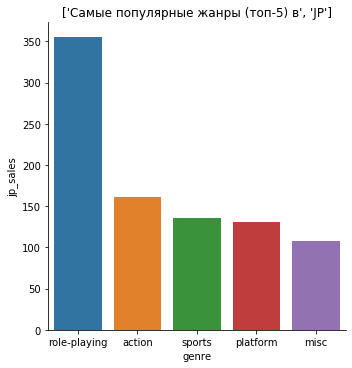

In [16]:
# Жанры
genres = 'Самые популярные жанры (топ-5) в'
dic_reg = {'na_sales': 'NA', 'eu_sales': 'EU', 'jp_sales': 'JP'}

for k, v in dic_reg.items():
    region_sales = k
    region = dic_reg.get(k)
    popularity('genre', region_sales, genres, region)


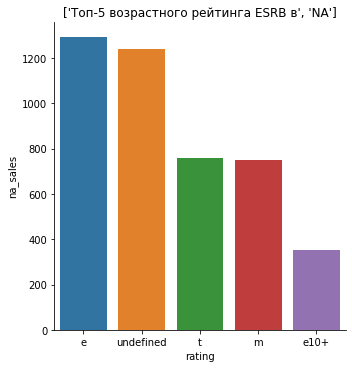

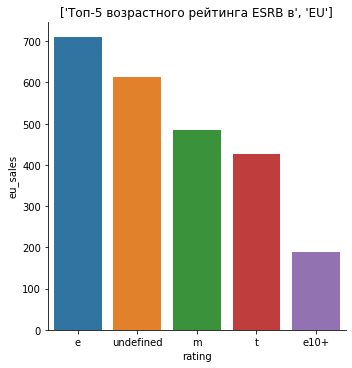

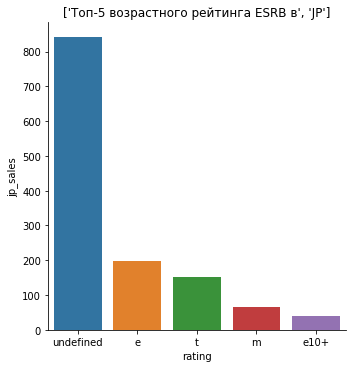

In [17]:
# Рейтинг
reiting_text = 'Топ-5 возрастного рейтинга ESRB в'
dic_reg = {'na_sales': 'NA', 'eu_sales': 'EU', 'jp_sales': 'JP'}

for k, v in dic_reg.items():
    region_sales = k
    region = dic_reg.get(k)
    popularity('rating', region_sales, reiting_text, region)

### Выводы.
 - Самые популярные платформы (топ-5). Для более наглядного представления используем гистограммы. При детальном рассмотрении список лидеров по трем регионам состоит всего из 8 платформ. Для региона NA главной платформой является `x360`, топ-5 замыкает платформа `ds`. Разница в продажах первым и пятым местом рейтинга около 120 мл копий. Для региона EU главной платформой является `ps2`, а топ-5 замыкает платформа `ps` с такой же разницей продаж. Для региона главной платформой является JP `ds`, на пятом месте `3ds`. Разница в продажах первым и пятым местом рейтинга около 75 мл копий. Также можно наблюдать на этих графиках разный объем продаж лидирующих платформ: в регионе NA около 600 мл копий, в регионе EU около 340 мл копий, в регионе JP около 175 мл копий.
 - Самые популярные жанры (топ-5). Топ-5 по всем регионам состоит из 7 жанров. В регионах NA и EU список лидеров похож. Жанр `action` возглавляет оба списка, а замыкает жанр `misc`. Для региона JP лидером является жанр `role-playing`, на 5 месте все тот же `misc`. Также можно наблюдать на этих графиках разный объем продаж по жанрам: в регионе NA около 850 мл копий у лидера и разрыв между 1 и 5 местом  около 500мл копий, в регионе EU около 550мл копий и разрыв между 1 и 5 местом  около 300мл копий, в регионе JP  у лидера около 350мл копий и разрыв между 1 и 5 местом  около 110мл копий.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе? Для более наглядного представления опять обращаемся к гистограммам. Топ-5 по всем возрастным рейтингам состоит из 5 вариантов оценок. В регионах NA и EU лидируют игры с рейтингом `e`, в регионе JP больше всего игр с отсутствующим рейтингом(`undefined`).На пятом месте во всех регионах игры с рейтингом `e10+`. Также можно наблюдать на этих графиках разный объем продаж в соответствии с ESRB рейтингом: в регионе NA около 1300 мл копий, в регионе EU около 700 мл копий, в регионе JP около 850 мл копий. Отвечая на вопрос о влиянии рейтинга на продажи, можно утверждать, что рейтинг влияет на продажи.



### 5. Проверка гипотезы

#### ***Гипотезы:***
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

In [18]:
# выборка Xbox One и PC 
def variation_hyp(column, value):
    variation = selection[selection[column] == value]
    variation = variation[(variation['user_score']!= 888)]
    variation.dropna(subset = ['user_score'], inplace = True)
    variation = variation['user_score']
    #print(variation)
    return variation
xbox_one = variation_hyp('platform','xone')
pc = variation_hyp('platform','pc')

print('Средний рейтинг платформы Xbox One', xbox_one.mean())
print('Средний рейтинг платформы PC', pc.mean())

# Дисперсии выборок
print('Дисперсия выборки Xbox One',np.var(xbox_one, ddof=1)) 
print('Дисперсия выборки PC',np.var(pc, ddof=1)) 

# проверка гипотезы
alpha = 0.1

results = st.ttest_ind(xbox_one, pc, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Средние пользовательские рейтинги платформ Xbox One и PC не одинаковы")
else:
    print("Средние пользовательские рейтинги платформ Xbox One и PC одинаковые")

Средний рейтинг платформы Xbox One 6.480327868852459
Средний рейтинг платформы PC 6.262162162162162
Дисперсия выборки Xbox One 1.4986065573770488
Дисперсия выборки PC 2.9366308774527954
p-значение: 0.405759137586845
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


In [19]:
# выборка Action и Sports
action = variation_hyp('genre','action')
sports = variation_hyp('genre','sports')
print('Средний рейтинг жанра Action', action.mean())
print('Средний рейтинг жанра Sports', sports.mean())

# Дисперсии выборок
print('Дисперсия выборки Action',np.var(action, ddof=1)) 
print('Дисперсия выборки Sports',np.var(sports, ddof=1)) 
# проверка гипотезы
alpha = 0.1

results = st.ttest_ind(action, sports, equal_var = True) # T-критерий Стьюдента

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Средние пользовательские рейтинги жанра Action и Sports разные")
else:
    print("Средние пользовательские рейтинги жанра Action и Sports одинаковые")

Средний рейтинг жанра Action 6.865829145728643
Средний рейтинг жанра Sports 5.279487179487179
Дисперсия выборки Action 1.7285234252068422
Дисперсия выборки Sports 2.4907425907425913
p-значение: 1.0553969945814193e-15
Средние пользовательские рейтинги жанра Action и Sports разные


### Выводы.
Проверка гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для доказательства использовалась гипотеза о равенстве средних двух генеральных совокупностей(тест Т-Стьюдента). Основанием для применения данного теста является результат проверки равенства дисперсий с помощью теста Левена: pvalue=1.0, что говорит о равенстве дисперсий. За нулевую была принята гипотеза о равенстве рейтингов платформ. В качестве генеральных совокупностей были взяты выборки по соответствующим платформам. При формировании выборок "отмели" все пропущенные значения, что бы они не влияли на средний показатель. Пороговое значение alpha задавалось высокое (0.1) из-за маленькой выборки и большой вероятности погрешноти. В результате проверки показал гипотеза не подтвердилась.

- Средние пользовательские рейтинги жанров Action и Sports разные. Схема доказательства гипотезы аналогична предыдущей. Результате проверки: гипотеза не подтвердилась.

### 6. Общий вывод

### Выводы.
В результате исследования выяснили:
- Всреднем за 7-11 лет появляются новые и исчезают старые платформы. Есть долгожители такие как wiiu(с 1994 года) и платформы, не выдерживающие конкуренции например gen(1990-1994).
- Влияние отзывов пользователей и критиков на продажи выясняли с помощью диаграмм и корреляции. Диаграммы рассеяния говорят о том, что чем выше рейтинг на платформах, тем больше продаж. Коэффициент корреляции между рейтингом от пользователей и продажами платформы имеет значение почти равно 0. То есть при изменении одной величины другая останется почти прежней. Коэффициент корреляции между оценкой критиков и продажами платформы показывает зависимость, однако не слишком сильной, то есть при увеличении одной величины, будет увеличиваться и вторая.
- Общее распределение игр по жанрам. Лидером оказался жанр `action`, разрыв между следующим конкурентом `sports` весьма существенный - 1000 игр, антилидером стал жанр `puzzle` с количеством около 600 игр. В гистограмме прибыльности снова лидирует `action`, разрыв между следующим конкурентом `sports` снова существенный - около 375 мл копий, антилидером в прибыльности стал жанр `strategy`.
- Самые популярные платформы (топ-5).Для региона NA главной платформой является `x360`, топ-5 замыкает платформа `ds`. Разница в продажах первым и пятым местом рейтинга около 120 мл копий. Для региона EU главной платформой является `ps2`, а топ-5 замыкает платформа `ps` с такой же разницей продаж. Для региона главной платформой является JP `ds`, на пятом месте `3ds`. Разница в продажах первым и пятым местом рейтинга около 75 мл копий. Также можно наблюдать на этих графиках разный объем продаж лидирующих платформ: в регионе NA около 600 мл копий, в регионе EU около 340 мл копий, в регионе JP около 175 мл копий.
- Самые популярные жанры (топ-5).В регионах NA и EU список лидеров похож. Жанр `action` возглавляет оба списка, а замыкает жанр `misc`. Для региона JP лидером является жанр `role-playing`, на 5 месте все тот же `misc`. Также можно наблюдать на этих графиках разный объем продаж по жанрам: в регионе NA около 850 мл копий у лидера и разрыв между 1 и 5 местом  около 500мл копий, в регионе EU около 550мл копий и разрыв между 1 и 5 местом  около 300мл копий, в регионе JP  у лидера около 350мл копий и разрыв между 1 и 5 местом  около 110мл копий.
- Топ-5 по всем возрастным рейтингам состоит из 6 вариантов оценок. Во всех трех регионах лидируют игры с рейтингом `e`, на пятом месте в регионах NA и JP игры с рейтингом `k-a` и в регионе EU `a0`. Также можно наблюдать на этих графиках разный объем продаж в соответствии с ESRB рейтингом: в регионе NA около 130 мл копий, в регионе EU около 700 мл копий, в регионе JP около 200 мл копий. Отвечая на вопрос о влиянии рейтинга на продажи, можно утверждать, что рейтинг влияет на продажи.
- Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для доказательства использовалась гипотеза о равенстве средних двух генеральных совокупностей, поскольку выборки имеют нормальное распределение.  За нулевую была принята гипотеза о равенстве рейтингов платформ. В качестве генеральных совокупностей были взяты выборки по соответствующим платформам. При формировании выборок "отмели" все пропущенные значения, чтобы они не влияли на средний показатель. Пороговое значение alpha задавалось высокое (0.1) из-за маленькой выборки и большой вероятности погрешности. В результате проверки показал гипотеза не подтвердилась.
- Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные. Схема доказательства гипотезы аналогична предыдущей. Результате проверки: гипотеза не подтвердилась.
